# TF Gaussian Process for Stock Prediction

## Load bitcoin stock data
This data was downloaded from Yahoo Finance here (https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD). 

**Stock:** Bitcoin USD (BTC-USD)   
**Data range:** Nov 5, 2019 - Nov 5, 2020

In [1]:
import pandas as pd
stock_data = pd.read_csv('BTC-USD.csv')
stock_data[:50]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-05,9413.004883,9457.417969,9256.931641,9342.527344,9342.527344,26198609047
1,2019-11-06,9340.864258,9423.237305,9305.909180,9360.879883,9360.879883,23133895764
2,2019-11-07,9352.393555,9368.476563,9202.353516,9267.561523,9267.561523,22700383838
3,2019-11-08,9265.368164,9272.759766,8775.534180,8804.880859,8804.880859,24333037836
4,2019-11-09,8809.468750,8891.818359,8793.163086,8813.582031,8813.582031,17578630605
5,2019-11-10,8812.489258,9103.826172,8806.162109,9055.526367,9055.526367,20587919881
6,2019-11-11,9056.917969,9081.279297,8700.608398,8757.788086,8757.788086,20265510765
7,2019-11-12,8759.751953,8853.768555,8685.427734,8815.662109,8815.662109,20309769107
8,2019-11-13,8812.033203,8836.841797,8761.651367,8808.262695,8808.262695,17545755404
9,2019-11-14,8811.936523,8826.943359,8692.551758,8708.094727,8708.094727,19084739974


In [2]:
close = stock_data[['Date','Close']]
close

,Date,Close
0,2019-11-05,9342.527344
1,2019-11-06,9360.879883
2,2019-11-07,9267.561523
3,2019-11-08,8804.880859
4,2019-11-09,8813.582031
...,...,...
362,2020-11-01,13737.109375
363,2020-11-02,13550.489258
364,2020-11-03,13950.300781
365,2020-11-04,14133.707031


## Prep data
We have to convert dates to integers to simply capture their sequential nature

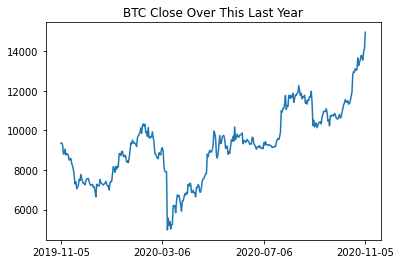

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.xticks(np.linspace(0,len(close) - 1,4))
plt.title('BTC Close Over This Last Year')
plt.plot(close['Date'],close['Close']);

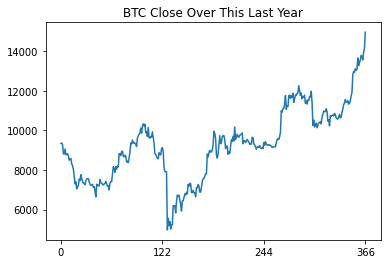

In [4]:
if not 'Day Number' in close.columns:
    close.insert(0,'Day Number', np.arange(0,len(close)))
if 'Date' in close.columns:
    close = close.drop(columns = ['Date'])

plt.xticks(np.linspace(0,len(close) - 1,4))
plt.title('BTC Close Over This Last Year')
plt.plot(close['Day Number'],close['Close']);

We also have to normalize our closing prices

min: 4970.788086, max: 14953.084961000002


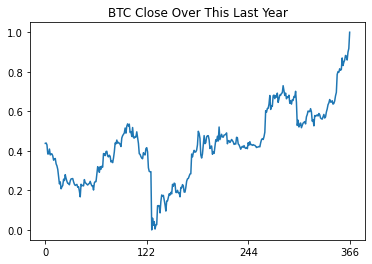

In [5]:
close_min = close['Close'].min()
close_max = close['Close'].max()
print(f'min: {close_min}, max: {close_max}')

norm_values = (close['Close'] - close_min) / (close_max - close_min)
close['Close Norm'] = norm_values

plt.xticks(np.linspace(0,len(close) - 1,4))
plt.title('BTC Close Over This Last Year')
plt.plot(close['Day Number'],close['Close Norm']);

In [6]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    
    x_train = data[:,:,0]
    y_train = data[:,:,-1]
    
    x_test = data_raw[lookback:,0]
    y_test = data_raw[lookback:,1]
    
    return [x_train, y_train, x_test, y_test]

lookback = 7 # choose sequence length
x_train, y_train, x_test, y_test = split_data(close, lookback)

In [7]:
# correct format
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],-1))
# y_train = y_train.reshape((y_train.shape[0],x_train.shape[1],-1))
# x_test = x_test.reshape(x_test.shape[0],-1)
# y_test = y_test.reshape(y_test.shape[0],-1)

# TF Documentation

## Imports

In [8]:
import time

import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tfp.math.psd_kernels
tf.enable_v2_behavior()

from mpl_toolkits.mplot3d import Axes3D
# %pylab inline
import matplotlib.pyplot as plt
# Configure plot defaults
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = '#666666'
%config InlineBackend.figure_format = 'png'

In [9]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Blog uses Noisy Sinusoidal Data
Here we generate training data from a noisy sinusoid, then sample a bunch of
curves from the posterior of the GP regression model. We use
[Adam](https://arxiv.org/abs/1412.6980) to optimize the kernel hyperparameters
(we minimize the negative log likelihood of the data under the prior). We
plot the training curve, followed by the true function and the posterior
samples.

In [10]:
def generate_1d_data(num_training_points, observation_noise_variance):
    """Generate noisy sinusoidal observations at a random set of points.

    Returns:
     observation_index_points, observations
    """
    index_points_ = np.random.uniform(-1., 1., (num_training_points, 1))
    index_points_ = index_points_.astype(np.float64)
    # y = f(x) + noise
    observations_ = (sinusoid(index_points_) +
                    np.random.normal(loc=0,
                                    scale=np.sqrt(observation_noise_variance),
                                    size=(num_training_points)))
    return index_points_, observations_

In [11]:
# Generate training data with a known noise level (we'll later try to recover
# this value from the data).
NUM_TRAINING_POINTS = 100
observation_index_points_, observations_ = generate_1d_data(
    num_training_points=NUM_TRAINING_POINTS,
    observation_noise_variance=.1)

## Setup input data like documentation

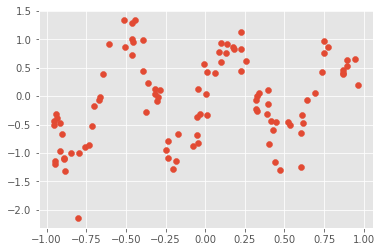

In [12]:
plt.scatter(observation_index_points_, observations_)

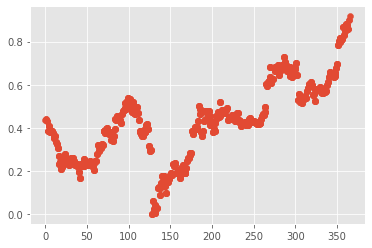

In [13]:
plt.scatter(x_train, y_train)

In [14]:
print('Compare x formats')
print(observation_index_points_[:5])
print()
print(np.round(x_train[:2],5))

Compare x formats
[[-0.67099985]
 [ 0.44043934]
 [-0.30422277]
 [ 0.32813316]
 [ 0.01269866]]

[[[0.]
  [1.]
  [2.]
  [3.]
  [4.]
  [5.]
  [6.]]

 [[1.]
  [2.]
  [3.]
  [4.]
  [5.]
  [6.]
  [7.]]]


In [15]:
print('Compare y formats')
print(observations_[:5])
print()
print(np.round(y_train[:5],5))

Compare y formats
[-0.05823221 -1.16219742 -0.07973644 -0.26543637 -0.33679928]

[[0.43795 0.43979 0.43044 0.38409 0.38496 0.4092  0.37937]
 [0.43979 0.43044 0.38409 0.38496 0.4092  0.37937 0.38517]
 [0.43044 0.38409 0.38496 0.4092  0.37937 0.38517 0.38443]
 [0.38409 0.38496 0.4092  0.37937 0.38517 0.38443 0.37439]
 [0.38496 0.4092  0.37937 0.38517 0.38443 0.37439 0.35274]]


We'll put priors on the kernel hyperparameters, and write the joint distribution of the hyperparameters and observed data using `tfd.JointDistributionNamed`.

In [16]:
def build_gp(amplitude, length_scale, observation_noise_variance):
    """Defines the conditional dist. of GP outputs, given kernel parameters."""

    # Create the covariance kernel, which will be shared between the prior (which we
    # use for maximum likelihood training) and the posterior (which we use for
    # posterior predictive sampling)
    kernel = tfk.ExponentiatedQuadratic(amplitude, length_scale)

    # Create the GP prior distribution, which we will use to train the model
    # parameters.
    return tfd.GaussianProcess(
      kernel=kernel,
      index_points=observation_index_points_,
      observation_noise_variance=observation_noise_variance)

#To condition the model on our observed data, we'll define a target_log_prob function, which takes the (still to be inferred) kernel hyperparameters.
# Use `tf.function` to trace the loss for more efficient evaluation.
@tf.function(autograph=False, experimental_compile=False)
def target_log_prob(amplitude, length_scale, observation_noise_variance):
    return gp_joint_model.log_prob({
      'amplitude': amplitude,
      'length_scale': length_scale,
      'observation_noise_variance': observation_noise_variance,
      'observations': observations_
    })

In [17]:
from tqdm import tqdm

In [18]:
starting_day = 0
ending_day = 0
predictions = []
days = 100

for i in tqdm(range(days)):
    if i == 0:
        starting_day = int(x_train[i,-1,-1]+1)
    if i == days-1:
        ending_day = int(x_train[i,-1,-1]+1)
    
    observation_index_points_, observations_ = x_train[i], y_train[i]

    gp_joint_model = tfd.JointDistributionNamed({
        'amplitude': tfd.LogNormal(loc=0., scale=np.float64(1.)),
        'length_scale': tfd.LogNormal(loc=0., scale=np.float64(1.)),
        'observation_noise_variance': tfd.LogNormal(loc=0., scale=np.float64(1.)),
        'observations': build_gp,
    })


    # Now let's optimize to find the parameter values with highest posterior probability. We'll define a variable for each parameter, and constrain their values to be positive.
    # Create the trainable model parameters, which we'll subsequently optimize.
    # Note that we constrain them to be strictly positive.
    constrain_positive = tfb.Shift(np.finfo(np.float64).tiny)(tfb.Exp())

    amplitude_var = tfp.util.TransformedVariable(
        initial_value=1.,
        bijector=constrain_positive,
        name='amplitude',
        dtype=np.float64)

    length_scale_var = tfp.util.TransformedVariable(
        initial_value=1.,
        bijector=constrain_positive,
        name='length_scale',
        dtype=np.float64)

    observation_noise_variance_var = tfp.util.TransformedVariable(
        initial_value=1.,
        bijector=constrain_positive,
        name='observation_noise_variance_var',
        dtype=np.float64)

    trainable_variables = [v.trainable_variables[0] for v in 
                           [amplitude_var,
                           length_scale_var,
                           observation_noise_variance_var]]

    # Now we optimize the model parameters.
    num_iters = 750
    optimizer = tf.optimizers.Adam(learning_rate=.01)

    # Store the likelihood values during training, so we can plot the progress
    lls_ = np.zeros(num_iters, np.float64)
    for it in range(num_iters):
        with tf.GradientTape() as tape:
            loss = -target_log_prob(amplitude_var, length_scale_var,
                                observation_noise_variance_var)
        grads = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
        lls_[it] = loss



    # Having trained the model, we'd like to sample from the posterior conditioned
    # on observations. We'd like the samples to be at points other than the training
    # inputs.

    x_sample = np.arange(x_train[i,0,0], x_test[i], len(x_train[i]+1)/200)
    x_sample = x_sample.reshape((x_sample.shape[0],-1))
    predictive_index_points_ = x_sample


    optimized_kernel = tfk.ExponentiatedQuadratic(amplitude_var, length_scale_var)
    gprm = tfd.GaussianProcessRegressionModel(
        kernel=optimized_kernel,
        index_points=predictive_index_points_,
        observation_index_points=observation_index_points_,
        observations=observations_,
        observation_noise_variance=observation_noise_variance_var,
        predictive_noise_variance=0.)

    # Create op to draw  25 independent samples, each of which is a *joint* draw
    # from the posterior at the predictive_index_points_. Since we have 200 input
    # locations as defined above, this posterior distribution over corresponding
    # function values is a 200-dimensional multivariate Gaussian distribution!
    num_samples = 25
    samples = gprm.sample(num_samples)
    
    samples_mean = np.mean(samples)
    predictions = predictions + [samples_mean]

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:56<00:00,  3.57s/it]


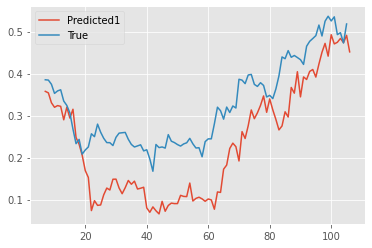

In [31]:
plt.plot(close['Day Number'][starting_day:ending_day+1], predictions, label='Predicted1')
# plt.plot(close['Day Number'][starting_day:ending_day+1], predictions2, label='Predicted2')
plt.plot(close['Day Number'][starting_day:ending_day], close['Close Norm'][starting_day:ending_day], label='True')
plt.legend();